In [ ]:
from google.colab import files
file = files.upload()

Saving data_breast_cancer.csv to data_breast_cancer.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import unittest
import pickle
import os
import random
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pylab as plt

data = np.genfromtxt('data_breast_cancer.csv', delimiter=',')
x = data[:, :-1] # for all but last column
y = data[:, -1] # for last column

X_train = x[:400, :]
Y_train = y[:400]
X_test = x[400:, :]
Y_test = y[400:]

from keras.models import Sequential
from keras.layers import Dense


# DNN

The code below runs and creates a learning curve for the deep neural net

In [ ]:
score_dict = {0: 0}

for j in range(5, 401, 5):
    print('Train data size: ', j)
    x = X_train[0:j, :]
    y = Y_train[0:j]

    
    classifier = Sequential() # Initialising the ANN
    classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
    classifier.fit(x, y, batch_size = 1, epochs = 50)

    Y_pred = classifier.predict(X_test)
    Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]
    
    score_dict[j] = f1_score(Y_pred, Y_test)
    print(f1_score(Y_pred, Y_test), 'Was the accuracy when the train data size was', j)



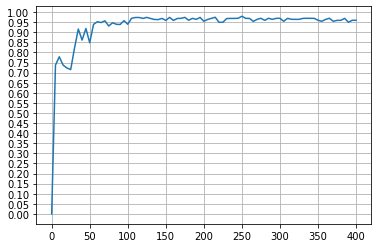

In [ ]:
plot_list = sorted(score_dict.items())
x_cord, y_cord = zip(*plot_list)
plt.plot(x_cord, y_cord)
plt.yticks(np.arange(min(y_cord), max(y_cord) + 0.05, 0.05))
plt.grid(True)
plt.show()

In [ ]:
plot_list

[(0, 0),
 (5, 0.7372549019607844),
 (10, 0.7782426778242678),
 (15, 0.7372549019607844),
 (20, 0.7230769230769232),
 (25, 0.714828897338403),
 (30, 0.8209606986899564),
 (35, 0.9157894736842105),
 (40, 0.8611111111111112),
 (45, 0.9183673469387754),
 (50, 0.8479262672811059),
 (55, 0.9387755102040817),
 (60, 0.9518716577540107),
 (65, 0.9479166666666666),
 (70, 0.9565217391304347),
 (75, 0.9306930693069307),
 (80, 0.9468085106382979),
 (85, 0.9393939393939394),
 (90, 0.9381443298969071),
 (95, 0.9574468085106385),
 (100, 0.9393939393939394),
 (105, 0.9690721649484536),
 (110, 0.972972972972973),
 (115, 0.972972972972973),
 (120, 0.968421052631579),
 (125, 0.9735449735449735),
 (130, 0.9680851063829787),
 (135, 0.963350785340314),
 (140, 0.9625668449197862),
 (145, 0.968421052631579),
 (150, 0.9583333333333333),
 (155, 0.9735449735449735),
 (160, 0.9583333333333333),
 (165, 0.9680851063829787),
 (170, 0.96875),
 (175, 0.9735449735449735),
 (180, 0.9591836734693878),
 (185, 0.96875),
 (1

Run the code above to get a test result with a chart

# ANN

The code below runs a neural network with one hidden layer. This is to verify our decision tree

In [ ]:
score_dict = {0: 0}

for j in range(5, 401, 5):
    print('Train data size: ', j)
    x = X_train[0:j, :]
    y = Y_train[0:j]

    
    classifier = Sequential() # Initialising the ANN
    classifier.add(Dense(units = 25, activation = 'sigmoid', input_dim = 30))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
    classifier.fit(x, y, batch_size = 1, epochs = 50)

    Y_pred = classifier.predict(X_test)
    Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]
    
    score_dict[j] = f1_score(Y_pred, Y_test)
    print(f1_score(Y_pred, Y_test), 'Was the accuracy when the train data size was', j)

Streaming output truncated to the last 5000 lines.
155/155 [==============================] - 1s 4ms/step - loss: 0.1217
0.9393939393939394 Was the accuracy when the train data size was 155
Train data size:  160
Epoch 1/50
160/160 [==============================] - 1s 4ms/step - loss: 0.8607
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6828
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.6276
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5800
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5371
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4907
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4554
Epoch 8/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4173
Epoch 9/50
160/160 [==============================] - 1s 4ms/step - loss: 0.3845
Epoch 10/50
160/160 [==============================] - 1s 4

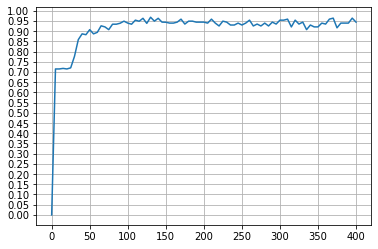

In [ ]:
plot_list = sorted(score_dict.items())
x_cord, y_cord = zip(*plot_list)
plt.plot(x_cord, y_cord)
plt.yticks(np.arange(min(y_cord), max(y_cord) + 0.05, 0.05))
plt.grid(True)
plt.show()

In [ ]:
plot_list

[(0, 0),
 (5, 0.714828897338403),
 (10, 0.714828897338403),
 (15, 0.7175572519083969),
 (20, 0.714828897338403),
 (25, 0.7203065134099617),
 (30, 0.7768595041322314),
 (35, 0.8584474885844748),
 (40, 0.8867924528301886),
 (45, 0.8826291079812207),
 (50, 0.9073170731707317),
 (55, 0.8867924528301886),
 (60, 0.8942307692307693),
 (65, 0.9261083743842364),
 (70, 0.9207920792079208),
 (75, 0.9073170731707317),
 (80, 0.934010152284264),
 (85, 0.934010152284264),
 (90, 0.9387755102040817),
 (95, 0.9489795918367346),
 (100, 0.9393939393939394),
 (105, 0.934010152284264),
 (110, 0.9538461538461538),
 (115, 0.9484536082474226),
 (120, 0.962962962962963),
 (125, 0.9381443298969071),
 (130, 0.9680851063829787),
 (135, 0.9489795918367346),
 (140, 0.962962962962963),
 (145, 0.9441624365482233),
 (150, 0.9435897435897436),
 (155, 0.9393939393939394),
 (160, 0.9393939393939394),
 (165, 0.9441624365482233),
 (170, 0.9587628865979382),
 (175, 0.9346733668341708),
 (180, 0.9489795918367346),
 (185, 0.94

#K-folded DNN


In [ ]:

FOLDS = 10
kf = createKFold(FOLDS)

cum_score = 0;
x = data[:, :-1] # for all but last column
y = data[:, -1] # for last column

print('The scores per run are:')
for train_index, test_index in kf.split(x):
    print('Train data size: ', j)
    X_train = x[train_index]
    Y_train = y[train_index]
    X_test = x[test_index]
    Y_test = y[test_index]

    
    classifier = Sequential() # Initialising the ANN
    classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
    classifier.fit(X_train, Y_train, batch_size = 1, epochs = 50)

    Y_pred = classifier.predict(X_test)
    Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]
    
    cum_score += f1_score(Y_pred, Y_test)
    print(f1_score(Y_pred, Y_test)
print("Accuracy (mean): ", cum_score / FOLDS)

In [ ]:

kf = createKFold(FOLDS)

cum_score = 0;

for train_index, test_index in kf.split(x):
        clf_bayes.fit(x[train_index], y[train_index])

        cum_score = cum_score + f1_score(y[test_index], clf_bayes.predict(x[test_index]))

        print(f1_score(y[test_index], clf_bayes.predict(x[test_index])))

    print("Accuracy (mean): ", cum_score / FOLDS)